# t-тест

In [1]:
import pandas as pd
import numpy as np
import scipy.stats

df = pd.read_csv('Running.csv')
df.head()

,Athlete,MileMinDur
0,0,0:06:21
1,0,0:07:00
2,0,0:12:44
3,1,0:06:25
4,1,0:07:24


### Параметры теста:
* Двусторонний тест
* alpha = 0.05
* Критическое значение t-критерия: ±1.9667
* Критическая область: (-∞, -1.9667] ∪ [1.9667, ∞)

$
\begin{align}
t = \frac{(M_1 - M_2) - (\mu_1 - \mu_2)}{s_{(M_1 - M_2)}}
\end{align}
$


$
\begin{align}
s_{(M_1 - M_2)} = \sqrt{\frac{s^2_1}{n_1} + \frac{s^2_2}{n_2}}
\end{align}
$

### Поправка Уэлча
$
\begin{align}
df = \frac{(V_1 + V_2)^2}{\frac{V^2_1}{n_1 - 1} + \frac{V^2_2}{n_2 - 1}}
\end{align}
$

$
V_1 = \frac{s^2_1}{n_1}
$

$
V_2 = \frac{s^2_2}{n_2}
$

In [2]:
df['MileSecDur'] = df['MileMinDur'].apply(lambda x: int(x.split(':')[1])*60 + int(x.split(':')[2]))

In [52]:
athletes = df[df['Athlete'] == 1]['MileSecDur']
non_athletes = df[df['Athlete'] == 0]['MileSecDur']

<Axes: >

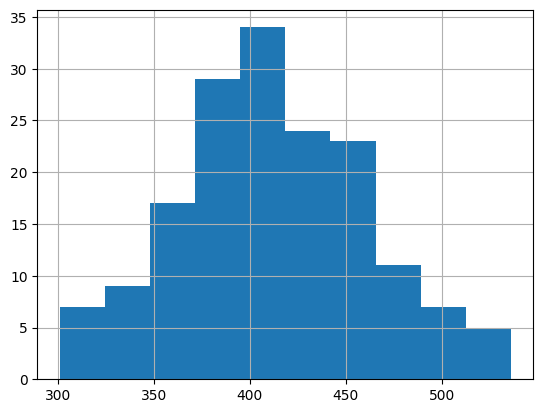

In [4]:
athletes.hist()

<Axes: >

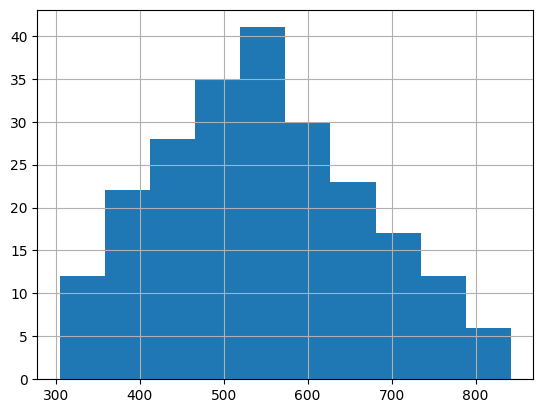

In [5]:
non_athletes.hist()

In [6]:
athletes.var()

2444.8588535962035

In [7]:
non_athletes.var()

14802.27848574238

In [8]:
n_1 = len(non_athletes)
n_2 = len(athletes)
print(n_1, n_2)

226 166


In [9]:
mean_1 = non_athletes.mean()
mean_2 = athletes.mean()
print(mean_1, mean_2)

546.1017699115044 411.31325301204816


In [10]:
var_1 = non_athletes.var() # dispersion
var_2 = athletes.var()
print(var_1, var_2)

14802.27848574238 2444.8588535962035


In [11]:
s_m1_m2 = np.sqrt(var_1/n_1 + var_2/n_2)
print(s_m1_m2)

8.956833862596019


In [12]:
t = (mean_1 - mean_2) / s_m1_m2
print(t)

15.048678915697742


In [13]:
v_1 = var_1/n_1
v_2 = var_2/n_2

df_welch = (v_1 + v_2)**2 / (v_1**2 / (n_1 - 1) + v_2**2 / (n_2 - 1))
print(df_welch)
print(int(df_welch))

315.79259489726667
315


In [14]:
df_student = n_2 + n_1 - 2
print(df_student)

390


In [29]:
def hypothesis_check(p_value, t_critical):
    if abs(p_value) < t_critical:
        print(f'Отвергаем Н0. Разница между средними статистически значима: {p_value} < {t_critical}')
    else:
        print('Не удалось отвергнуть H0')

t_critical = 1.9667

In [15]:
import scipy.stats

In [19]:
scipy.stats.ttest_ind_from_stats(mean_1, np.sqrt(var_1), n_1,
                                 mean_2, np.sqrt(var_2), n_2, equal_var=False)
# среднее первой группы, среднекваратичное откл группы и кол-во наблюдений в группе
# equal_var=False - dof по Велчу считается

Ttest_indResult(statistic=15.048678915697742, pvalue=5.8245788902602594e-39)

In [20]:
scipy.stats.ttest_ind(non_athletes, athletes, equal_var=False)

TtestResult(statistic=15.048678915697742, pvalue=5.8245788902602594e-39, df=315.79259489726667)

In [21]:
p_value = scipy.stats.ttest_ind(non_athletes, athletes, equal_var=False)[-1]

In [30]:
hypothesis_check(p_value, t_critical)

Отвергаем Н0. Разница между средними статистически значима: 5.8245788902602594e-39 < 1.9667


$
CI = (M_1 - M_2) \pm t * m_{(M_1-M_2)}
$

In [34]:
CI_low = mean_1 - mean_2 - t_critical * s_m1_m2
CI_up = mean_1 - mean_2 + t_critical * s_m1_m2
print(CI_low, CI_up)

117.17311174188869 152.40392205702386


In [38]:
X = [23, 3, 11, 35, -3, -10]
Y = [29, 1, 20, 3, 0, 0]
p_value = scipy.stats.ttest_rel(X, Y)
print(p_value)

TtestResult(statistic=0.15504341823651055, pvalue=0.8828516345668911, df=5)


In [53]:
X = pd.Series([13, 0, 6, 9, -1, 0])
Y = pd.Series([4, 1, 5, 1, 20, 0])

In [55]:
m1 = X.mean()
m2 = Y.mean()
print(m1, m2)

4.5 5.166666666666667


In [57]:
var1 = X.var()
var2 = Y.var()
print(var1, var2)

33.1 56.56666666666666


### Поправка Уэлча
$
\begin{align}
df = \frac{(V_1 + V_2)^2}{\frac{V^2_1}{n_1 - 1} + \frac{V^2_2}{n_2 - 1}}
\end{align}
$

$
V_1 = \frac{s^2_1}{n_1}
$

$
V_2 = \frac{s^2_2}{n_2}
$

In [61]:
v1 = var1 / len(X)
v2 = var2 / len(Y)
df = (v1 + v2) ** 2 / (  v1**2/(len(X) - 1) + v2**2/(len(Y) - 1) )
print(int(df))

9


In [67]:
s_m1_m2 = np.sqrt(var1/len(X) + var2/len(Y))
print(s_m1_m2)

3.865804501581067


In [68]:
t = (m1 - m2)/s_m1_m2
print(t)

-0.1724522454236908


In [66]:
scipy.stats.ttest_ind(X, Y, equal_var=False)

TtestResult(statistic=-0.1724522454236908, pvalue=0.866753894833007, df=9.358983180447911)

In [77]:
X = pd.Series([3, 2, 98, 34, 11, 2])
m = X.mean()
print(f'mean = {m}')
std = X.std()
print(f"std = {std}")
mu = 7
t = (m - mu) / (std / np.sqrt(len(X)))
print(f"t = {t}")


mean = 25.0
std = 37.81005157362259
t = 1.1661136003542576


In [ ]:
CI_low = mean_1 - mean_2 - t_critical * s_m1_m2
CI_up = mean_1 - mean_2 + t_critical * s_m1_m2
print(CI_low, CI_up)